In [1]:
# imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transforms = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root="./Data/MNIST", train=True, download=True, transform=transforms)

/home/avraham/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
test_data = datasets.MNIST(root="../Data", train=False, download=True, transform=transforms)

In [5]:
train_loader = DataLoader(train_data, batch_size=10,shuffle=True)
test_loader = DataLoader(test_data, batch_size=10,shuffle=False)

In [6]:
# Conv2s(channels, features, kernel size, stride)

# 1 color channel, 6 filters, 3x3 kernel, sdtride=1
conv1 = nn.Conv2d(1,6,3,1) 

# 6 input filters from conv1, 16 filters, 3x3 kernel size, stride=1
conv2 = nn.Conv2d(6,16,3,1)

In [7]:
for i, (x_train, y_train) in enumerate(train_data):
    break

In [8]:

x = x_train.view(1,1,28,28)

In [9]:
x = F.relu(conv1(x))

In [10]:
x.shape

torch.Size([1, 6, 26, 26])

In [11]:
x = F.max_pool2d(x, 2, 2)

In [12]:
x.shape

torch.Size([1, 6, 13, 13])

In [13]:
x = F.relu(conv2(x))

In [14]:
x.shape

torch.Size([1, 16, 11, 11])

In [15]:
x = F.max_pool2d(x, 2, 2)

In [16]:
x.shape

torch.Size([1, 16, 5, 5])

In [17]:
 x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # convs layers
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        
        # fc layers
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        return X

In [19]:
torch.manual_seed(42)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
import time
start_time = time.time()

# variables
epochs = 5
train_losses  = []
test_losses   = []
train_correct = []
test_correct  = []

# For Loop Epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Train
    for b,(X_train, y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
       
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 ==0:
            print(f"Epoch: {i} Batch: {b} Loss: {loss.item()}")
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
    
    # Test
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)


curent_time = time.time()
total = curent_time - start_time
print(f"train took {total/60} minutes")

Epoch: 0 Batch: 600 Loss: 0.040556300431489944
Epoch: 0 Batch: 1200 Loss: 0.08253470808267593
Epoch: 0 Batch: 1800 Loss: 0.3642271161079407
Epoch: 0 Batch: 2400 Loss: 0.018563764169812202
Epoch: 0 Batch: 3000 Loss: 0.007249881513416767
Epoch: 0 Batch: 3600 Loss: 0.002068703295662999
Epoch: 0 Batch: 4200 Loss: 0.5755265355110168
Epoch: 0 Batch: 4800 Loss: 0.020265642553567886
Epoch: 0 Batch: 5400 Loss: 0.0038307863287627697
Epoch: 0 Batch: 6000 Loss: 0.07171741873025894
Epoch: 1 Batch: 600 Loss: 0.01541823148727417
Epoch: 1 Batch: 1200 Loss: 0.04238170012831688
Epoch: 1 Batch: 1800 Loss: 0.0018037048866972327
Epoch: 1 Batch: 2400 Loss: 0.05199195072054863
Epoch: 1 Batch: 3000 Loss: 0.34056130051612854
Epoch: 1 Batch: 3600 Loss: 7.691586506552994e-05
Epoch: 1 Batch: 4200 Loss: 0.0003346456214785576
Epoch: 1 Batch: 4800 Loss: 0.0013848835369572043
Epoch: 1 Batch: 5400 Loss: 0.0007460182532668114
Epoch: 1 Batch: 6000 Loss: 0.01124281994998455
Epoch: 2 Batch: 600 Loss: 0.0004451390414033085

In [23]:
y_pred, y_train

(tensor([[-2.9799e+01, -2.0206e+01, -1.8174e+01,  0.0000e+00, -3.0829e+01,
          -1.9592e+01, -3.1882e+01, -2.3234e+01, -2.3481e+01, -2.5794e+01],
         [-3.2746e+01, -2.2063e+01, -1.9718e+01, -2.7595e+01, -2.1933e-03,
          -2.3042e+01, -2.4496e+01, -1.9735e+01, -1.6386e+01, -6.1235e+00],
         [-3.2178e+01, -2.2644e+01, -1.1921e-07, -2.3818e+01, -1.5975e+01,
          -2.6072e+01, -2.1073e+01, -2.8877e+01, -2.2266e+01, -3.1216e+01],
         [-8.9449e+00, -7.9248e+00, -8.5966e+00, -8.8412e+00, -9.3944e+00,
          -8.2262e+00, -1.5142e+01, -3.7078e-03, -7.6379e+00, -6.1916e+00],
         [-4.1339e+01, -2.7476e+01, -2.1787e+01, -2.7887e+01, -2.1242e+01,
          -2.1935e+01, -2.4083e+01, -2.5694e+01,  0.0000e+00, -1.9105e+01],
         [-2.7949e+01, -1.9366e+01, -2.0879e+01, -3.4422e+01,  0.0000e+00,
          -2.3614e+01, -1.9274e+01, -2.4990e+01, -2.3535e+01, -1.8981e+01],
         [-3.7344e+01, -2.2025e+01, -2.6443e+01, -2.3842e-07, -4.1085e+01,
          -1.5405e+

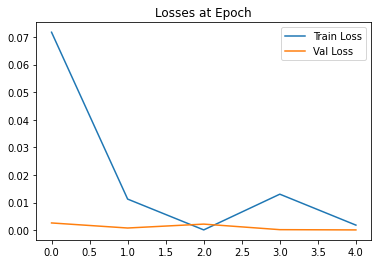

In [24]:
plt.plot(train_losses, label = "Train Loss")
plt.plot(test_losses, label = "Val Loss")
plt.title("Losses at Epoch")
plt.legend()

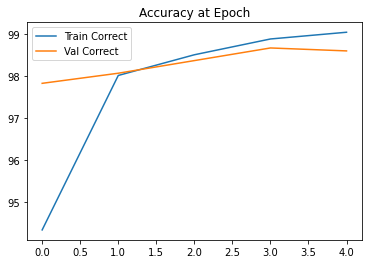

In [25]:
plt.plot([t/600 for t in train_correct], label = "Train Correct")
plt.plot([t/100 for t in test_correct], label = "Val Correct")
plt.title("Accuracy at Epoch")
plt.legend()